<a href="https://colab.research.google.com/github/keithferns98/DeepLearning/blob/main/flowers_data_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import PIL
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from glob import glob

In [ ]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

228827136/228813984 [==============================] - 1s 0us/step


In [ ]:
data_dir

'./datasets/flower_photos'

In [ ]:
folders=glob(data_dir + '/*')
folders

['./datasets/flower_photos/roses',
 './datasets/flower_photos/dandelion',
 './datasets/flower_photos/LICENSE.txt',
 './datasets/flower_photos/sunflowers',
 './datasets/flower_photos/daisy',
 './datasets/flower_photos/tulips']

In [ ]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [ ]:
list(data_dir.glob('*/*.jpg'))

[PosixPath('datasets/flower_photos/roses/2448812029_047d981092_m.jpg'),
 PosixPath('datasets/flower_photos/roses/515121050_dcb99890be.jpg'),
 PosixPath('datasets/flower_photos/roses/3450344423_63ba3190e3.jpg'),
 PosixPath('datasets/flower_photos/roses/15699509054_d3e125286f_n.jpg'),
 PosixPath('datasets/flower_photos/roses/5292988046_a10f4b0365_n.jpg'),
 PosixPath('datasets/flower_photos/roses/2423565102_2f1a00bb1b_n.jpg'),
 PosixPath('datasets/flower_photos/roses/9167147034_0a66ee3616_n.jpg'),
 PosixPath('datasets/flower_photos/roses/6111589202_8b9555364c_m.jpg'),
 PosixPath('datasets/flower_photos/roses/8035908422_87220425d2_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4292443009_3a2831b0b9_m.jpg'),
 PosixPath('datasets/flower_photos/roses/6676529655_9672b6f955_m.jpg'),
 PosixPath('datasets/flower_photos/roses/2408236801_f43c6bcff2.jpg'),
 PosixPath('datasets/flower_photos/roses/6053143173_991c011b23.jpg'),
 PosixPath('datasets/flower_photos/roses/16157873719_bf0bdf8558_n.jpg'),

In [ ]:
image_len=len(list(data_dir.glob('*/*.jpg')))

In [ ]:
image_len

3670

In [ ]:
roses=list(data_dir.glob('roses/*'))
roses

[PosixPath('datasets/flower_photos/roses/2448812029_047d981092_m.jpg'),
 PosixPath('datasets/flower_photos/roses/515121050_dcb99890be.jpg'),
 PosixPath('datasets/flower_photos/roses/3450344423_63ba3190e3.jpg'),
 PosixPath('datasets/flower_photos/roses/15699509054_d3e125286f_n.jpg'),
 PosixPath('datasets/flower_photos/roses/5292988046_a10f4b0365_n.jpg'),
 PosixPath('datasets/flower_photos/roses/2423565102_2f1a00bb1b_n.jpg'),
 PosixPath('datasets/flower_photos/roses/9167147034_0a66ee3616_n.jpg'),
 PosixPath('datasets/flower_photos/roses/6111589202_8b9555364c_m.jpg'),
 PosixPath('datasets/flower_photos/roses/8035908422_87220425d2_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4292443009_3a2831b0b9_m.jpg'),
 PosixPath('datasets/flower_photos/roses/6676529655_9672b6f955_m.jpg'),
 PosixPath('datasets/flower_photos/roses/2408236801_f43c6bcff2.jpg'),
 PosixPath('datasets/flower_photos/roses/6053143173_991c011b23.jpg'),
 PosixPath('datasets/flower_photos/roses/16157873719_bf0bdf8558_n.jpg'),

In [ ]:
len(roses)

641

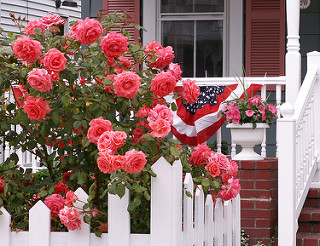

In [ ]:
PIL.Image.open(str(roses[55]))

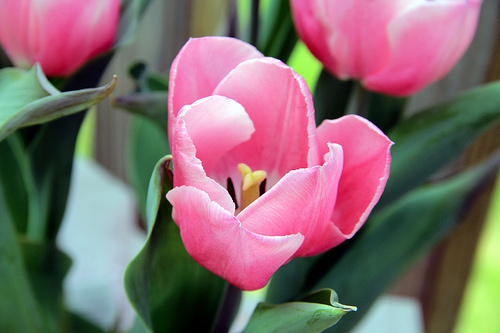

In [ ]:
tulips=list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[11]))

In [ ]:
flowers_images_dict={
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion' : list(data_dir.glob('dandelion/*')),
    'sunflowers' : list(data_dir.glob('sunflowers/*')),
    'tulips' :list(data_dir.glob('tulips/*')),
}

In [ ]:
flowers_images_dict['roses']

[PosixPath('datasets/flower_photos/roses/2448812029_047d981092_m.jpg'),
 PosixPath('datasets/flower_photos/roses/515121050_dcb99890be.jpg'),
 PosixPath('datasets/flower_photos/roses/3450344423_63ba3190e3.jpg'),
 PosixPath('datasets/flower_photos/roses/15699509054_d3e125286f_n.jpg'),
 PosixPath('datasets/flower_photos/roses/5292988046_a10f4b0365_n.jpg'),
 PosixPath('datasets/flower_photos/roses/2423565102_2f1a00bb1b_n.jpg'),
 PosixPath('datasets/flower_photos/roses/9167147034_0a66ee3616_n.jpg'),
 PosixPath('datasets/flower_photos/roses/6111589202_8b9555364c_m.jpg'),
 PosixPath('datasets/flower_photos/roses/8035908422_87220425d2_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4292443009_3a2831b0b9_m.jpg'),
 PosixPath('datasets/flower_photos/roses/6676529655_9672b6f955_m.jpg'),
 PosixPath('datasets/flower_photos/roses/2408236801_f43c6bcff2.jpg'),
 PosixPath('datasets/flower_photos/roses/6053143173_991c011b23.jpg'),
 PosixPath('datasets/flower_photos/roses/16157873719_bf0bdf8558_n.jpg'),

In [ ]:
flowers_labels_dict={
    'roses': 0,
    'daisy': 1,
    'dandelion' : 2,
    'sunflowers' : 3,
    'tulips' : 4,
}

In [ ]:
img=cv.imread(str(flowers_images_dict['roses'][20]))
img

array([[[ 20,  11,  21],
        [ 12,  12,  24],
        [  4,  18,  36],
        ...,
        [ 14,  50,  96],
        [  8,  48,  97],
        [ 14,  46,  87]],

       [[  0,   0,   7],
        [  9,  15,  26],
        [  0,   4,  21],
        ...,
        [  7,  44,  88],
        [  5,  45,  94],
        [ 17,  49,  92]],

       [[ 11,  25,  37],
        [  0,   0,  13],
        [  7,  10,  24],
        ...,
        [ 18,  55,  99],
        [  9,  49, 101],
        [  9,  43,  86]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  5,  14,  24],
        [  7,  16,  30],
        [  6,  14,  31]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  5,  13,  26],
        [  9,  16,  31],
        [  8,  15,  34]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  5,  11,  24],
        [  8,  15,  32],
        [  7,  14,  33]]

In [ ]:
img.shape

(240, 184, 3)

In [ ]:
cv.resize(img,(180,180)).shape

(180, 180, 3)

In [ ]:
X,y=[],[]

for flower_name,images in flowers_images_dict.items():
  for image in images:
    img=cv.imread(str(image))
    resized_img=cv.resize(img,(150,150))
    X.append(resized_img)
    y.append(flowers_labels_dict[flower_name])

In [ ]:
X[0]

array([[[184, 165, 249],
        [165, 176, 243],
        [170, 168, 230],
        ...,
        [125, 112, 146],
        [119, 107, 136],
        [168, 143, 200]],

       [[167, 180, 239],
        [142, 191, 230],
        [140, 184, 213],
        ...,
        [  6,   6,  33],
        [ 13,  14,  35],
        [120, 106, 145]],

       [[169, 172, 245],
        [137, 183, 231],
        [136, 180, 216],
        ...,
        [ 98,  95, 139],
        [ 15,  12,  42],
        [121, 108, 142]],

       ...,

       [[163, 163, 205],
        [129, 156, 174],
        [ 61,  64,  65],
        ...,
        [166, 161, 163],
        [159, 158, 157],
        [174, 160, 201]],

       [[161, 153, 197],
        [131, 155, 163],
        [ 25,  33,  22],
        ...,
        [215, 205, 186],
        [220, 212, 193],
        [208, 184, 220]],

       [[177, 153, 212],
        [154, 143, 188],
        [137, 116, 144],
        ...,
        [207, 179, 223],
        [204, 182, 218],
        [197, 166, 231]]

In [ ]:
y[:5]

[0, 0, 0, 0, 0]

In [ ]:
X=np.array(X)
y=np.array(y)

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.1)

In [42]:
X_train.shape,X_test.shape

((3303, 150, 150, 3), (367, 150, 150, 3))

In [43]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [44]:
X_train_scaled[0]

array([[[0.99215686, 0.74117647, 0.65490196],
        [0.98823529, 0.76078431, 0.6627451 ],
        [0.98823529, 0.78431373, 0.67843137],
        ...,
        [0.98039216, 0.81176471, 0.63529412],
        [0.98431373, 0.81176471, 0.64313725],
        [0.98431373, 0.81568627, 0.64705882]],

       [[0.97647059, 0.74901961, 0.65098039],
        [0.97254902, 0.74117647, 0.62745098],
        [0.96862745, 0.7372549 , 0.61960784],
        ...,
        [1.        , 0.79215686, 0.60784314],
        [1.        , 0.79215686, 0.60784314],
        [1.        , 0.78823529, 0.60784314]],

       [[0.99607843, 0.77647059, 0.67843137],
        [0.99215686, 0.76078431, 0.63529412],
        [0.99607843, 0.74901961, 0.61176471],
        ...,
        [0.99215686, 0.78039216, 0.58431373],
        [0.99215686, 0.77647059, 0.58039216],
        [0.98823529, 0.77254902, 0.57647059]],

       ...,

       [[0.25098039, 0.32156863, 0.22352941],
        [0.10588235, 0.18431373, 0.12941176],
        [0.27058824, 0

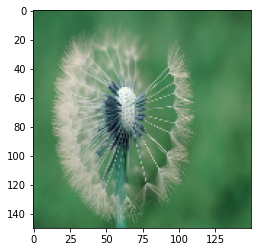

In [47]:
plt.imshow(X_train_scaled[30])

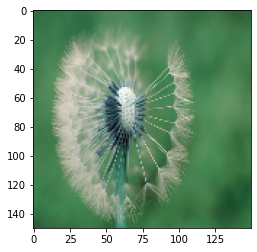

In [48]:
plt.imshow(X_train[30])

In [52]:

model=Sequential([
       layers.Conv2D(16,3,padding='same',activation='relu'),
       layers.BatchNormalization(),
       layers.MaxPooling2D(),
       layers.Conv2D(32,3,padding='same',activation='relu'),
       layers.MaxPooling2D(),
       layers.Conv2D(64,3,padding='same',activation='relu'),
       layers.MaxPooling2D(),
       layers.Flatten(),
       layers.Dense(128,activation='relu'),
       layers.Dense(5)

])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled,y_train,epochs=20)

Epoch 1/20
104/104 [==============================] - 125s 1s/step - loss: 1.5185 - accuracy: 0.4360
Epoch 2/20
104/104 [==============================] - 97s 934ms/step - loss: 0.9394 - accuracy: 0.6315
Epoch 3/20
104/104 [==============================] - 81s 783ms/step - loss: 0.7368 - accuracy: 0.7269
Epoch 4/20
104/104 [==============================] - 98s 941ms/step - loss: 0.5303 - accuracy: 0.8096
Epoch 5/20
104/104 [==============================] - 101s 972ms/step - loss: 0.3200 - accuracy: 0.8916
Epoch 6/20
104/104 [==============================] - 89s 850ms/step - loss: 0.1605 - accuracy: 0.9540
Epoch 7/20
104/104 [==============================] - 98s 948ms/step - loss: 0.0962 - accuracy: 0.9706
Epoch 8/20
104/104 [==============================] - 93s 893ms/step - loss: 0.0664 - accuracy: 0.9797
Epoch 9/20
104/104 [==============================] - 82s 792ms/step - loss: 0.0614 - accuracy: 0.9840
Epoch 10/20
104/104 [==============================] - 81s 781ms/step - lo

In [56]:
import os
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint( 
    os.path.join(os.getcwd(),'model2.h5'),
    save_weights_only=True,
    monitor='accuracy',
    save_best_only=True)
model2=Sequential([
       layers.Conv2D(16,3,padding='same',activation='relu'),
       layers.BatchNormalization(),
       layers.MaxPooling2D(),
       layers.Conv2D(32,3,padding='same',activation='relu'),
       layers.MaxPooling2D(),
       layers.Conv2D(64,3,padding='same',activation='relu'),
       layers.MaxPooling2D(),
       layers.Flatten(),
       layers.Dense(128,activation='relu'),
       layers.Dense(5,activation='softmax')

])

model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'],
              )

model2.fit(X_train_scaled,y_train,epochs=20,callbacks=[callback,model_checkpoint_callback])

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


104/104 [==============================] - 89s 837ms/step - loss: 1.4830 - accuracy: 0.4493
Epoch 2/20
104/104 [==============================] - 82s 789ms/step - loss: 0.9628 - accuracy: 0.6337
Epoch 3/20
104/104 [==============================] - 83s 794ms/step - loss: 0.7471 - accuracy: 0.7121
Epoch 4/20
104/104 [==============================] - 82s 790ms/step - loss: 0.5760 - accuracy: 0.7853
Epoch 5/20
104/104 [==============================] - 81s 781ms/step - loss: 0.3901 - accuracy: 0.8568
Epoch 6/20
104/104 [==============================] - 81s 782ms/step - loss: 0.2127 - accuracy: 0.9298
Epoch 7/20
104/104 [==============================] - 81s 781ms/step - loss: 0.1452 - accuracy: 0.9537
Epoch 8/20
104/104 [==============================] - 81s 782ms/step - loss: 0.1298 - accuracy: 0.9603
Epoch 9/20
104/104 [==============================] - 81s 784ms/step - loss: 0.0672 - accuracy: 0.9815
Epoch 10/20
104/104 [==============================] - 81s 783ms/step - loss: 0.0505

In [57]:
model2.evaluate(X_test_scaled,y_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


12/12 [==============================] - 4s 323ms/step - loss: 1.9286 - accuracy: 0.6540


[1.9286062717437744, 0.6539509296417236]

In [59]:
predictions = model2.predict(X_test_scaled)
predictions

array([[2.0230135e-02, 9.7976911e-01, 4.9865480e-07, 1.4126522e-12,
        2.7390507e-07],
       [9.9908423e-01, 3.0607152e-06, 1.1682124e-08, 6.6330240e-11,
        9.1262045e-04],
       [1.0748120e-03, 5.2093513e-02, 9.4676554e-01, 5.3906579e-06,
        6.0775634e-05],
       ...,
       [1.8945511e-01, 2.4062131e-02, 2.4091182e-03, 2.7498847e-01,
        5.0908512e-01],
       [2.2596865e-05, 1.2326125e-06, 2.1112637e-06, 1.5610121e-06,
        9.9997246e-01],
       [1.5714190e-03, 3.1058320e-03, 9.9516368e-01, 1.0685072e-04,
        5.2237781e-05]], dtype=float32)

In [60]:
score = tf.nn.softmax(predictions[0])
np.argmax(score)

1

In [61]:
y_test[0]

1

In [74]:
data_augmentation=tf.keras.Sequential(
    [
     layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(150, 
                                                              150,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
    ]
)

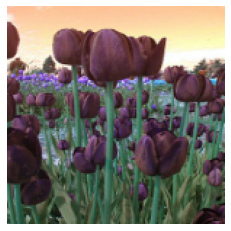

In [66]:
plt.axis('off')
plt.imshow(X_train_scaled[0])

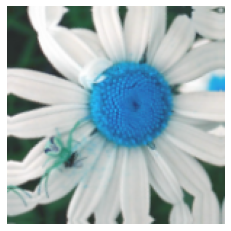

In [79]:
plt.axis('off')
plt.imshow(data_augmentation(X_train_scaled)[88])

In [75]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint( 
    os.path.join(os.getcwd(),'model3.h5'),
    save_weights_only=True,
    monitor='accuracy',
    save_best_only=True)
model3=Sequential([
       data_augmentation,
       layers.Conv2D(16,3,padding='same',activation='relu'),
       layers.BatchNormalization(),
       layers.MaxPooling2D(),
       layers.Conv2D(32,3,padding='same',activation='relu'),
       layers.MaxPooling2D(),
       layers.Conv2D(64,3,padding='same',activation='relu'),
       layers.MaxPooling2D(),
       layers.Dropout(0.2),
       layers.Flatten(),
       layers.Dense(128,activation='relu'),
       layers.Dense(5,activation='softmax')

])

model3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'],
              )

model3.fit(X_train_scaled,y_train,epochs=20,callbacks=[callback,model_checkpoint_callback])

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


104/104 [==============================] - 116s 1s/step - loss: 1.5523 - accuracy: 0.4048
Epoch 2/20
104/104 [==============================] - 98s 942ms/step - loss: 1.0776 - accuracy: 0.5634
Epoch 3/20
104/104 [==============================] - 98s 946ms/step - loss: 0.9865 - accuracy: 0.6125
Epoch 4/20
104/104 [==============================] - 96s 920ms/step - loss: 0.8890 - accuracy: 0.6533
Epoch 5/20
104/104 [==============================] - 96s 919ms/step - loss: 0.8547 - accuracy: 0.6627
Epoch 6/20
104/104 [==============================] - 96s 922ms/step - loss: 0.7863 - accuracy: 0.6912
Epoch 7/20
104/104 [==============================] - 95s 918ms/step - loss: 0.7635 - accuracy: 0.7021
Epoch 8/20
104/104 [==============================] - 96s 919ms/step - loss: 0.7564 - accuracy: 0.7009
Epoch 9/20
104/104 [==============================] - 96s 921ms/step - loss: 0.7232 - accuracy: 0.7172
Epoch 10/20
104/104 [==============================] - 96s 922ms/step - loss: 0.6816 -

In [76]:
model3.evaluate(X_test_scaled,y_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


12/12 [==============================] - 3s 236ms/step - loss: 0.9283 - accuracy: 0.6921


[0.9282618761062622, 0.692098081111908]